In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import cPickle as pickle

In [2]:
%matplotlib inline

pd.set_option('display.max_columns', 500)

####Add some final features

In [4]:
df = pd.read_pickle('df_1to10999_features.pkl')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6996 entries, 0 to 10999
Data columns (total 37 columns):
OBJECTID                  6996 non-null int64
WOKEY                     6996 non-null int64
LOCATION                  6996 non-null object
ADDRDESC                  6996 non-null object
INITDT_dt                 6996 non-null datetime64[ns]
FLDSTARTDT_dt             6996 non-null datetime64[ns]
FLDENDDT_dt               6996 non-null datetime64[ns]
DURATION                  6996 non-null timedelta64[ns]
DURATION_td               6996 non-null float64
latitude                  6996 non-null float64
longitude                 6996 non-null float64
address                   6996 non-null object
Seattle_dist              6996 non-null float64
Space_Needle_dist         6996 non-null float64
Pike_Place_dist           6996 non-null float64
Convention_Center_dist    6996 non-null float64
Woodland_Park_dist        6996 non-null float64
Queene_Anne_dist          6996 non-null float64
INIT_Q

In [9]:
df['INITDT_date_only'] = df['INITDT_dt'].apply( lambda x: x.date())
df['INITDT_date_only'] = pd.to_datetime(df.INITDT_date_only)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6996 entries, 0 to 10999
Data columns (total 38 columns):
OBJECTID                  6996 non-null int64
WOKEY                     6996 non-null int64
LOCATION                  6996 non-null object
ADDRDESC                  6996 non-null object
INITDT_dt                 6996 non-null datetime64[ns]
FLDSTARTDT_dt             6996 non-null datetime64[ns]
FLDENDDT_dt               6996 non-null datetime64[ns]
DURATION                  6996 non-null timedelta64[ns]
DURATION_td               6996 non-null float64
latitude                  6996 non-null float64
longitude                 6996 non-null float64
address                   6996 non-null object
Seattle_dist              6996 non-null float64
Space_Needle_dist         6996 non-null float64
Pike_Place_dist           6996 non-null float64
Convention_Center_dist    6996 non-null float64
Woodland_Park_dist        6996 non-null float64
Queene_Anne_dist          6996 non-null float64
INIT_Q

In [11]:
df.head(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,Seattle_dist,Space_Needle_dist,Pike_Place_dist,Convention_Center_dist,Woodland_Park_dist,Queene_Anne_dist,INIT_Quarter,days_end_FY,INIT_month,neighborhood_label,GEOID,GEO.id_x,GEO.display-label_x,Median_Home_Value,Home_Margin_of_Error,GEO.id_y,GEO.display-label_y,Median_Income,Income_Margin_of_Error,Number_potholes,SND_FEACOD,ST_CODE,SEGMENT_TY,DIVIDED_CO,VEHICLE_US,INITDT_date_only
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA",5.338641,6.158729,5.467939,5.688451,9.453253,7.300465,1,3,3,93,530330114011,1500000US530330114011,"Block Group 1, Census Tract 114.01, King Count...",307500,53269,1500000US530330114011,"Block Group 1, Census Tract 114.01, King Count...",53523,15208,3,1,0,1,1,1,2010-03-29
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...",3.222458,2.867154,3.231487,2.889531,2.654837,2.610214,1,3,3,42,530330053022,1500000US530330053022,"Block Group 2, Census Tract 53.02, King County...",NaN,NaN,1500000US530330053022,"Block Group 2, Census Tract 53.02, King County...",NaN,NaN,2,5,0,1,1,1,2010-03-30


####Add No. of potholes

In [12]:
df_number_potholes = pd.read_pickle('df_number_potholes.pkl')

In [13]:
df_number_potholes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593 entries, 0 to 1592
Data columns (total 3 columns):
INITDT_date_only    1593 non-null datetime64[ns]
Number_potholes     1593 non-null int64
cumul_potholes      1593 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 49.8 KB


In [14]:
df = df.reset_index()
df = pd.merge(df, df_number_potholes, how='left', on='INITDT_date_only')
df = df.set_index('index')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6996 entries, 0 to 10999
Data columns (total 40 columns):
OBJECTID                  6996 non-null int64
WOKEY                     6996 non-null int64
LOCATION                  6996 non-null object
ADDRDESC                  6996 non-null object
INITDT_dt                 6996 non-null datetime64[ns]
FLDSTARTDT_dt             6996 non-null datetime64[ns]
FLDENDDT_dt               6996 non-null datetime64[ns]
DURATION                  6996 non-null timedelta64[ns]
DURATION_td               6996 non-null float64
latitude                  6996 non-null float64
longitude                 6996 non-null float64
address                   6996 non-null object
Seattle_dist              6996 non-null float64
Space_Needle_dist         6996 non-null float64
Pike_Place_dist           6996 non-null float64
Convention_Center_dist    6996 non-null float64
Woodland_Park_dist        6996 non-null float64
Queene_Anne_dist          6996 non-null float64
INIT_Q

In [16]:
df.head(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,Seattle_dist,Space_Needle_dist,Pike_Place_dist,Convention_Center_dist,Woodland_Park_dist,Queene_Anne_dist,INIT_Quarter,days_end_FY,INIT_month,neighborhood_label,GEOID,GEO.id_x,GEO.display-label_x,Median_Home_Value,Home_Margin_of_Error,GEO.id_y,GEO.display-label_y,Median_Income,Income_Margin_of_Error,Number_potholes_x,SND_FEACOD,ST_CODE,SEGMENT_TY,DIVIDED_CO,VEHICLE_US,INITDT_date_only,Number_potholes_y,cumul_potholes
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA",5.338641,6.158729,5.467939,5.688451,9.453253,7.300465,1,3,3,93,530330114011,1500000US530330114011,"Block Group 1, Census Tract 114.01, King Count...",307500,53269,1500000US530330114011,"Block Group 1, Census Tract 114.01, King Count...",53523,15208,3,1,0,1,1,1,2010-03-29,3,8
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...",3.222458,2.867154,3.231487,2.889531,2.654837,2.610214,1,3,3,42,530330053022,1500000US530330053022,"Block Group 2, Census Tract 53.02, King County...",NaN,NaN,1500000US530330053022,"Block Group 2, Census Tract 53.02, King County...",NaN,NaN,2,5,0,1,1,1,2010-03-30,2,8


####Add Temperature

In [17]:
def get_temp(df):
    '''
    INPUT: df
    OUTPUt: df
    Pass in the cleaned data as a dataframe and add a new column representing
    avg temp on day when pothole is initiated
    '''
    df_weather = pd.read_csv('data/weather.csv')
    df_weather = df_weather[['date','Time','Temp.']]
    df_weather.rename(columns={'Temp.': 'Temp'}, inplace=True)
    df_weather['dt'] = pd.to_datetime(df_weather.apply(lambda x: x['date']\
        + ' ' + x['Time'], 1))
    df_weather = df_weather.set_index('dt')
    df_weather = df_weather.drop(['date','Time'], axis=1)
    df_weather = df_weather.apply(lambda x: x.str[:-5])
    df_weather = df_weather.convert_objects(convert_numeric=True)
    df_weather = df_weather.resample('D', how='mean')

    df['INITDT_date_only'] = df['INITDT_dt'].apply( lambda x: x.date())
    df['INITDT_date_only'] = pd.to_datetime(df.INITDT_date_only)

    df = df.reset_index()
    df = pd.merge(df, df_weather, how='left', left_on='INITDT_date_only', right_index=True)
    df = df.set_index('index')

    return df

In [18]:
df = get_temp(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6996 entries, 0 to 10999
Data columns (total 41 columns):
OBJECTID                  6996 non-null int64
WOKEY                     6996 non-null int64
LOCATION                  6996 non-null object
ADDRDESC                  6996 non-null object
INITDT_dt                 6996 non-null datetime64[ns]
FLDSTARTDT_dt             6996 non-null datetime64[ns]
FLDENDDT_dt               6996 non-null datetime64[ns]
DURATION                  6996 non-null timedelta64[ns]
DURATION_td               6996 non-null float64
latitude                  6996 non-null float64
longitude                 6996 non-null float64
address                   6996 non-null object
Seattle_dist              6996 non-null float64
Space_Needle_dist         6996 non-null float64
Pike_Place_dist           6996 non-null float64
Convention_Center_dist    6996 non-null float64
Woodland_Park_dist        6996 non-null float64
Queene_Anne_dist          6996 non-null float64
INIT_Q

####Add Min Distance 

(this should be added to the get distance function in create_features.py)

In [20]:
df['min_dist'] = df[['Seattle_dist','Space_Needle_dist','Pike_Place_dist','Convention_Center_dist','Woodland_Park_dist']].min(axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6996 entries, 0 to 10999
Data columns (total 42 columns):
OBJECTID                  6996 non-null int64
WOKEY                     6996 non-null int64
LOCATION                  6996 non-null object
ADDRDESC                  6996 non-null object
INITDT_dt                 6996 non-null datetime64[ns]
FLDSTARTDT_dt             6996 non-null datetime64[ns]
FLDENDDT_dt               6996 non-null datetime64[ns]
DURATION                  6996 non-null timedelta64[ns]
DURATION_td               6996 non-null float64
latitude                  6996 non-null float64
longitude                 6996 non-null float64
address                   6996 non-null object
Seattle_dist              6996 non-null float64
Space_Needle_dist         6996 non-null float64
Pike_Place_dist           6996 non-null float64
Convention_Center_dist    6996 non-null float64
Woodland_Park_dist        6996 non-null float64
Queene_Anne_dist          6996 non-null float64
INIT_Q

In [22]:
df.head(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,Seattle_dist,Space_Needle_dist,Pike_Place_dist,Convention_Center_dist,Woodland_Park_dist,Queene_Anne_dist,INIT_Quarter,days_end_FY,INIT_month,neighborhood_label,GEOID,GEO.id_x,GEO.display-label_x,Median_Home_Value,Home_Margin_of_Error,GEO.id_y,GEO.display-label_y,Median_Income,Income_Margin_of_Error,Number_potholes_x,SND_FEACOD,ST_CODE,SEGMENT_TY,DIVIDED_CO,VEHICLE_US,INITDT_date_only,Number_potholes_y,cumul_potholes,Temp,min_dist
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA",5.338641,6.158729,5.467939,5.688451,9.453253,7.300465,1,3,3,93,530330114011,1500000US530330114011,"Block Group 1, Census Tract 114.01, King Count...",307500,53269,1500000US530330114011,"Block Group 1, Census Tract 114.01, King Count...",53523,15208,3,1,0,1,1,1,2010-03-29,3,8,46.397436,5.338641
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...",3.222458,2.867154,3.231487,2.889531,2.654837,2.610214,1,3,3,42,530330053022,1500000US530330053022,"Block Group 2, Census Tract 53.02, King County...",NaN,NaN,1500000US530330053022,"Block Group 2, Census Tract 53.02, King County...",NaN,NaN,2,5,0,1,1,1,2010-03-30,2,8,43.375758,2.654837


####Clean before modeling

In [23]:
df.apply(lambda x: np.sum(pd.isnull(x)/float(df.shape[0])))

OBJECTID                  0.000000
WOKEY                     0.000000
LOCATION                  0.000000
ADDRDESC                  0.000000
INITDT_dt                 0.000000
FLDSTARTDT_dt             0.000000
FLDENDDT_dt               0.000000
DURATION                  0.000000
DURATION_td               0.000000
latitude                  0.000000
longitude                 0.000000
address                   0.000000
Seattle_dist              0.000000
Space_Needle_dist         0.000000
Pike_Place_dist           0.000000
Convention_Center_dist    0.000000
Woodland_Park_dist        0.000000
Queene_Anne_dist          0.000000
INIT_Quarter              0.000000
days_end_FY               0.000000
INIT_month                0.000000
neighborhood_label        0.000000
GEOID                     0.000000
GEO.id_x                  0.009148
GEO.display-label_x       0.009148
Median_Home_Value         0.063894
Home_Margin_of_Error      0.063894
GEO.id_y                  0.009148
GEO.display-label_y 

In [25]:
df.drop(['GEO.id_y','GEO.display-label_y'], axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6996 entries, 0 to 10999
Data columns (total 40 columns):
OBJECTID                  6996 non-null int64
WOKEY                     6996 non-null int64
LOCATION                  6996 non-null object
ADDRDESC                  6996 non-null object
INITDT_dt                 6996 non-null datetime64[ns]
FLDSTARTDT_dt             6996 non-null datetime64[ns]
FLDENDDT_dt               6996 non-null datetime64[ns]
DURATION                  6996 non-null timedelta64[ns]
DURATION_td               6996 non-null float64
latitude                  6996 non-null float64
longitude                 6996 non-null float64
address                   6996 non-null object
Seattle_dist              6996 non-null float64
Space_Needle_dist         6996 non-null float64
Pike_Place_dist           6996 non-null float64
Convention_Center_dist    6996 non-null float64
Woodland_Park_dist        6996 non-null float64
Queene_Anne_dist          6996 non-null float64
INIT_Q

In [27]:
df[pd.isnull(df.Home_Margin_of_Error)].shape, df[pd.isnull(df.Median_Home_Value)].shape

((447, 40), (447, 40))

In [29]:
df = df[np.isfinite(df['Median_Home_Value'])]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6549 entries, 0 to 10999
Data columns (total 40 columns):
OBJECTID                  6549 non-null int64
WOKEY                     6549 non-null int64
LOCATION                  6549 non-null object
ADDRDESC                  6549 non-null object
INITDT_dt                 6549 non-null datetime64[ns]
FLDSTARTDT_dt             6549 non-null datetime64[ns]
FLDENDDT_dt               6549 non-null datetime64[ns]
DURATION                  6549 non-null timedelta64[ns]
DURATION_td               6549 non-null float64
latitude                  6549 non-null float64
longitude                 6549 non-null float64
address                   6549 non-null object
Seattle_dist              6549 non-null float64
Space_Needle_dist         6549 non-null float64
Pike_Place_dist           6549 non-null float64
Convention_Center_dist    6549 non-null float64
Woodland_Park_dist        6549 non-null float64
Queene_Anne_dist          6549 non-null float64
INIT_Q

In [32]:
df.apply(lambda x: np.sum(pd.isnull(x)/float(df.shape[0])))

OBJECTID                  0
WOKEY                     0
LOCATION                  0
ADDRDESC                  0
INITDT_dt                 0
FLDSTARTDT_dt             0
FLDENDDT_dt               0
DURATION                  0
DURATION_td               0
latitude                  0
longitude                 0
address                   0
Seattle_dist              0
Space_Needle_dist         0
Pike_Place_dist           0
Convention_Center_dist    0
Woodland_Park_dist        0
Queene_Anne_dist          0
INIT_Quarter              0
days_end_FY               0
INIT_month                0
neighborhood_label        0
GEOID                     0
GEO.id_x                  0
GEO.display-label_x       0
Median_Home_Value         0
Home_Margin_of_Error      0
Median_Income             0
Income_Margin_of_Error    0
Number_potholes_x         0
SND_FEACOD                0
ST_CODE                   0
SEGMENT_TY                0
DIVIDED_CO                0
VEHICLE_US                0
INITDT_date_only    

In [33]:
df[df.neighborhood_label == ''].shape

(203, 40)

This is nasty.  I'd tried to change it in clean_features.py, but it didn't work.  Don't forget to include this.

In [36]:
df[df.GEOID == ''].shape

(0, 40)

In [37]:
df = df[df.neighborhood_label != '']

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6346 entries, 0 to 10999
Data columns (total 40 columns):
OBJECTID                  6346 non-null int64
WOKEY                     6346 non-null int64
LOCATION                  6346 non-null object
ADDRDESC                  6346 non-null object
INITDT_dt                 6346 non-null datetime64[ns]
FLDSTARTDT_dt             6346 non-null datetime64[ns]
FLDENDDT_dt               6346 non-null datetime64[ns]
DURATION                  6346 non-null timedelta64[ns]
DURATION_td               6346 non-null float64
latitude                  6346 non-null float64
longitude                 6346 non-null float64
address                   6346 non-null object
Seattle_dist              6346 non-null float64
Space_Needle_dist         6346 non-null float64
Pike_Place_dist           6346 non-null float64
Convention_Center_dist    6346 non-null float64
Woodland_Park_dist        6346 non-null float64
Queene_Anne_dist          6346 non-null float64
INIT_Q

In [39]:
df[df.neighborhood_label == ''].shape

(0, 40)

In [40]:
df.isnull().values.any()

False

In [41]:
df.neighborhood_label = df.neighborhood_label.astype('category')
df.SND_FEACOD = df.SND_FEACOD.astype('category')
df.ST_CODE = df.ST_CODE.astype('category')
df.SEGMENT_TY = df.SEGMENT_TY.astype('category')
df.DIVIDED_CO = df.DIVIDED_CO.astype('category')
df.VEHICLE_US = df.VEHICLE_US.astype('category')

In [42]:
df['b_DURATION_td_95'] = df.DURATION_td < df.DURATION_td.quantile(.95)

In [43]:
df['b_DURATION_td_IQuart'] = (df.DURATION_td < df.DURATION_td.quantile(.75)) & (df.DURATION_td > df.DURATION_td.quantile(.25))

In [44]:
df['b_long_repair'] = df.DURATION_td > 3

In [48]:
df[df.DURATION_td < df.DURATION_td.quantile(.95)].shape[0]/float(df.shape[0])

0.9479987393633785

In [50]:
df[df['b_DURATION_td_95']].shape

(6016, 43)

####Focus modeling on repair durations less than the 95th percentile

In [175]:
df_95 = df[df['b_DURATION_td_95']]

####Get rid of meaningless columns

In [65]:
df_95.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 10999
Data columns (total 43 columns):
OBJECTID                  6016 non-null int64
WOKEY                     6016 non-null int64
LOCATION                  6016 non-null object
ADDRDESC                  6016 non-null object
INITDT_dt                 6016 non-null datetime64[ns]
FLDSTARTDT_dt             6016 non-null datetime64[ns]
FLDENDDT_dt               6016 non-null datetime64[ns]
DURATION                  6016 non-null timedelta64[ns]
DURATION_td               6016 non-null float64
latitude                  6016 non-null float64
longitude                 6016 non-null float64
address                   6016 non-null object
Seattle_dist              6016 non-null float64
Space_Needle_dist         6016 non-null float64
Pike_Place_dist           6016 non-null float64
Convention_Center_dist    6016 non-null float64
Woodland_Park_dist        6016 non-null float64
Queene_Anne_dist          6016 non-null float64
INIT_Q

In [176]:
df_95.drop(['OBJECTID','WOKEY','LOCATION','ADDRDESC','address','Seattle_dist','Space_Needle_dist','Pike_Place_dist',
           'Convention_Center_dist','Woodland_Park_dist','Queene_Anne_dist','latitude','longitude','GEOID','GEO.id_x',
           'GEO.display-label_x','Number_potholes_x'], axis=1, inplace=True)

C:\Users\andersrmr\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [177]:
df_95.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 10999
Data columns (total 26 columns):
INITDT_dt                 6016 non-null datetime64[ns]
FLDSTARTDT_dt             6016 non-null datetime64[ns]
FLDENDDT_dt               6016 non-null datetime64[ns]
DURATION                  6016 non-null timedelta64[ns]
DURATION_td               6016 non-null float64
INIT_Quarter              6016 non-null int64
months_end_FY             6016 non-null int64
INIT_month                6016 non-null int64
neighborhood_label        6016 non-null category
Median_Home_Value         6016 non-null float64
Home_Margin_of_Error      6016 non-null float64
Median_Income             6016 non-null float64
Income_Margin_of_Error    6016 non-null float64
SND_FEACOD                6016 non-null category
ST_CODE                   6016 non-null category
SEGMENT_TY                6016 non-null category
DIVIDED_CO                6016 non-null category
VEHICLE_US                6016 non-null category

In [68]:
df_95.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 10999
Data columns (total 26 columns):
INITDT_dt                 6016 non-null datetime64[ns]
FLDSTARTDT_dt             6016 non-null datetime64[ns]
FLDENDDT_dt               6016 non-null datetime64[ns]
DURATION                  6016 non-null timedelta64[ns]
DURATION_td               6016 non-null float64
INIT_Quarter              6016 non-null int64
days_end_FY               6016 non-null int64
INIT_month                6016 non-null int64
neighborhood_label        6016 non-null category
Median_Home_Value         6016 non-null float64
Home_Margin_of_Error      6016 non-null float64
Median_Income             6016 non-null float64
Income_Margin_of_Error    6016 non-null float64
SND_FEACOD                6016 non-null category
ST_CODE                   6016 non-null category
SEGMENT_TY                6016 non-null category
DIVIDED_CO                6016 non-null category
VEHICLE_US                6016 non-null category

In [73]:
df.rename(columns={'days_end_FY': 'months_end_FY'}, inplace=True)

In [178]:
df_95.rename(columns={'days_end_FY': 'months_end_FY'}, inplace=True)

In [179]:
df_95.groupby('b_long_repair').describe().T

b_long_repair          False                                                  \
                       count                    mean                     std   
DURATION                3610  1 days 15:22:46.204986  0 days 19:09:50.210727   
DURATION_td             3610                1.628532               0.7900849   
Home_Margin_of_Error    3610                72352.98                71417.08   
INIT_Quarter            3610                2.108033                1.136545   
INIT_month              3610                5.347645                 3.52746   
Income_Margin_of_Error  3610                23003.31                15123.22   
Median_Home_Value       3610                423917.8                151728.9   
Median_Income           3610                70857.15                30656.97   
Number_potholes_y       3610                7.536011                6.812044   
Temp                    3610                 52.0161                9.451171   
b_DURATION_td_95        3610                       1                       0   
b_DURATION_td_IQuart    3610               0.4393352               0.4963749   
cumul_potholes          3610                29.57535                52.75148   
min_dist                3610                2.720247                 1.63016   
months_end_FY           3610               0.6523546                 3.52746   

b_long_repair                                                              \
                                    min              25%              50%   
DURATION                0 days 23:00:00  1 days 00:00:00  1 days 00:00:00   
DURATION_td                           0                1                1   
Home_Margin_of_Error               7920            34796            50905   
INIT_Quarter                          1                1                2   
INIT_month                            1                3                4   
Income_Margin_of_Error             2719            12634            19705   
Median_Home_Value                162800           327600           378400   
Median_Income                      6917            51250            65682   
Number_potholes_y                     1                3                6   
Temp                             25.925          45.3125          50.4151   
b_DURATION_td_95                   True                1                1   
b_DURATION_td_IQuart              False                0                0   
cumul_potholes                        1                9               14   
min_dist                     0.05907421         1.428714         2.447762   
months_end_FY                        -6               -2                2   

b_long_repair                                            True   \
                                    75%              max count   
DURATION                2 days 00:00:00  3 days 23:00:00  2406   
DURATION_td                           2                3  2406   
Home_Margin_of_Error              83015           991420  2406   
INIT_Quarter                          3                4  2406   
INIT_month                            8               12  2406   
Income_Margin_of_Error            29825            85483  2406   
Median_Home_Value                482900           984200  2406   
Median_Income                     85268           225813  2406   
Number_potholes_y                     9               60  2406   
Temp                           57.66842         81.53333  2406   
b_DURATION_td_95                      1             True  2406   
b_DURATION_td_IQuart                  1             True  2406   
cumul_potholes                       27              355  2406   
min_dist                       3.853499         8.495078  2406   
months_end_FY                         3                5  2406   

b_long_repair                                                           \
                                          mean                     std   
DURATION                7 days 18:23:19.002493  4 days 13:

Some promising variables that differ going from short to long: months_end_FY increases, cumul_potholes increases, temp slightly colder, number of potholes increases.  Note this leaves out the categorical variables, neighborhood label, street features.

####Scatter plot

In [76]:
import matplotlib
matplotlib.style.use('ggplot')

In [79]:
from pandas.tools.plotting import scatter_matrix

In [80]:
core_features = ['months_end_FY', 'cumul_potholes', 'Temp', 'Number_potholes_y', 
                 'Median_Home_Value', 'Median_Income', 'min_dist', 'INIT_month']
colors = ['red' if ix else 'blue' for ix in df.b_long_repair]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019A703C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002016BD30>]], dtype=object)

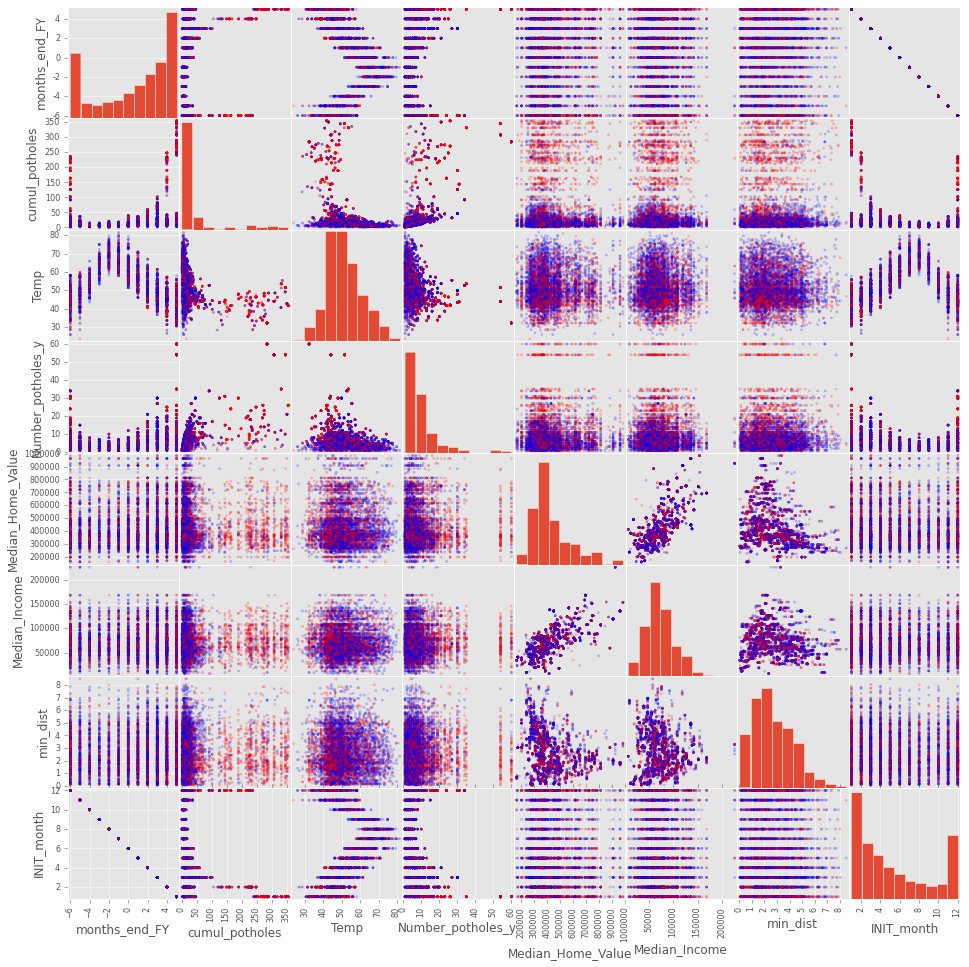

In [81]:
scatter_matrix(df[core_features], alpha=0.2, figsize=(16, 16), diagonal='hist', color=colors)

A promising start would be: Temp, cumul_potholes/Number of potholes, Median_Income/Median_Home_Value

In [ ]:
Tremendous amount of aliasing/colinearity in numerical variables: Number of potholes ~ months end of FY ~ Temp ~ number of potholes/cumul  potholes, which is high in Jan/Dec

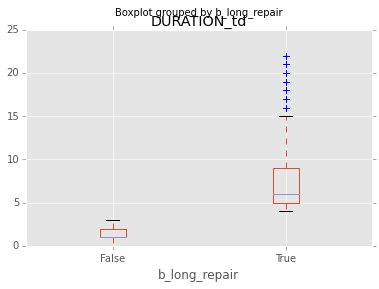

In [82]:
df_95.boxplot('DURATION_td', by = 'b_long_repair')

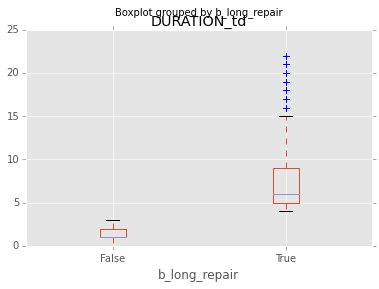

In [84]:
# fig = plt.figure()
ax = fig.add_subplot(111)
df_95.boxplot('DURATION_td', by = 'b_long_repair')
plt.savefig('bar_long_repair.png')

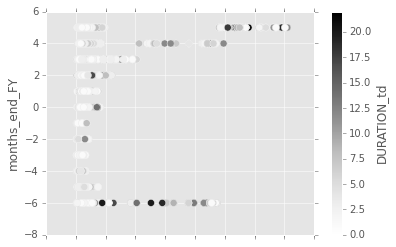

In [85]:
df_95.plot(kind='scatter', x='cumul_potholes', y='months_end_FY', c='DURATION_td', s=50);

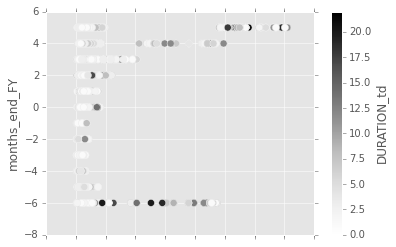

In [86]:
ax = fig.add_subplot(111)
df_95.plot(kind='scatter', x='cumul_potholes', y='months_end_FY', c='DURATION_td', s=50);
plt.savefig('scatter_cumul_potholes.png')

####Logistic Regression and DecisionTree Classifier and call it a night

In [180]:
df_95['long_repair'] = df_95['b_long_repair'].apply(lambda x: 1 if x == True else 0) 

C:\Users\andersrmr\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
df_95.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 10999
Data columns (total 27 columns):
INITDT_dt                 6016 non-null datetime64[ns]
FLDSTARTDT_dt             6016 non-null datetime64[ns]
FLDENDDT_dt               6016 non-null datetime64[ns]
DURATION                  6016 non-null timedelta64[ns]
DURATION_td               6016 non-null float64
INIT_Quarter              6016 non-null int64
months_end_FY             6016 non-null int64
INIT_month                6016 non-null int64
neighborhood_label        6016 non-null category
Median_Home_Value         6016 non-null float64
Home_Margin_of_Error      6016 non-null float64
Median_Income             6016 non-null float64
Income_Margin_of_Error    6016 non-null float64
SND_FEACOD                6016 non-null category
ST_CODE                   6016 non-null category
SEGMENT_TY                6016 non-null category
DIVIDED_CO                6016 non-null category
VEHICLE_US                6016 non-null category

In [95]:
from sklearn.linear_model import LogisticRegression

In [97]:
X = df_95[['cumul_potholes','Median_Home_Value']]
y = df_95['long_repair']

In [102]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 10999
Data columns (total 2 columns):
cumul_potholes       6016 non-null int64
Median_Home_Value    6016 non-null float64
dtypes: float64(1), int64(1)
memory usage: 141.0 KB


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [104]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [105]:
lr.score(X_test,y_test)

0.62956810631229232

In [106]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test, lr.predict(X_test))

0.58314479638009054

In [107]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, lr.predict(X_test)) #To understand this, I either read the documentation or create my own.

array([[586, 142],
       [304, 172]])

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=8, subsample=0.5, 
                                 max_features='auto', learning_rate=0.05)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=8, max_features='auto', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [110]:
gbc.score(X_test,y_test)

0.60215946843853818

In [111]:
skm.roc_auc_score(y_test, gbc.predict(X_test)) #Notice the quick, convenient way to get y_predict on X_test

0.57066095669036854

####OK, let's add another numerical variable.

In [112]:
X = df_95[['cumul_potholes','Median_Home_Value','Temp']]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [114]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [115]:
lr.score(X_test,y_test)

0.64202657807308972

In [116]:
skm.roc_auc_score(y_test, lr.predict(X_test))

0.58726567550096953

####Basically, all the info in the numerical variables is in there now.

In [117]:
X = df_95[['cumul_potholes','Median_Home_Value','Temp', 'months_end_FY']]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [119]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [120]:
lr.score(X_test,y_test)

0.6312292358803987

####Let's try some categorical variables.

In [125]:
df_95_dum_neighborhood_label = pd.get_dummies(df_95.neighborhood_label)

In [126]:
X = df_95_dum_neighborhood_label

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [128]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [129]:
lr.score(X_test,y_test)

0.54401993355481726

In [132]:
df_95_data = pd.concat([df_95.ix[:, ['cumul_potholes','Median_Home_Value','Temp', 'months_end_FY']],
        df_95_dum_neighborhood_label], axis=1)

In [133]:
X=df_95_data

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [135]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [136]:
lr.score(X_test,y_test)

0.62790697674418605

####Disappointing.  Let's get another set of dummies.

In [137]:
df_95_dum_SND_FEACOD = pd.get_dummies(df_95.SND_FEACOD)
df_95_dum_ST_CODE = pd.get_dummies(df_95.ST_CODE)
df_95_dum_SEGMENT_TY = pd.get_dummies(df_95.SEGMENT_TY)
df_95_dum_DIVIDED_CO = pd.get_dummies(df_95.DIVIDED_CO)
df_95_dum_VEHICLE_US = pd.get_dummies(df_95.VEHICLE_US)

In [140]:
df_95_data = pd.concat([df_95_dum_SND_FEACOD, df_95_dum_ST_CODE, df_95_dum_SEGMENT_TY, df_95_dum_DIVIDED_CO,
        df_95_dum_VEHICLE_US], axis=1)

In [141]:
X=df_95_data

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [143]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [144]:
lr.score(X_test,y_test)

0.4019933554817276

In [145]:
X = df_95[['cumul_potholes','Median_Home_Value','Temp', 'months_end_FY','min_dist']]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [147]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [148]:
lr.score(X_test,y_test)

0.63455149501661134

In [181]:
df_95_data = pd.concat([df_95.ix[:, ['cumul_potholes','Median_Home_Value','Temp', 'months_end_FY','min_dist']],
        df_95_dum_neighborhood_label, df_95_dum_SND_FEACOD, df_95_dum_ST_CODE, df_95_dum_SEGMENT_TY, df_95_dum_DIVIDED_CO,
        df_95_dum_VEHICLE_US], axis=1)

In [182]:
X=df_95_data

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [152]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [153]:
lr.score(X_test,y_test)

0.62126245847176076

In [154]:
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=8, subsample=0.5, 
                                 max_features='auto', learning_rate=0.05)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=8, max_features='auto', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [155]:
gbc.score(X_test,y_test)

0.63455149501661134

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1) #Wouldn't take the class_weight = 'auto' option)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [158]:
rfc.score(X_test, y_test)

0.64784053156146182

In [159]:
skm.roc_auc_score(y_test, rfc.predict(X_test))

0.60225436328377502

In [161]:
from sklearn.metrics import precision_score, recall_score

In [163]:
precision_score(y_test, rfc.predict(X_test)), recall_score(y_test, rfc.predict(X_test))

(0.58280254777070062, 0.38445378151260506)

####The only thing I have left to try is NLP on that LOCATION column

Also, it would be nice to plot which ones I'm not getting right.

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
clf = DecisionTreeClassifier()

In [166]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [167]:
clf.score(X_test, y_test)

0.60382059800664456

In [168]:
skm.roc_auc_score(y_test, clf.predict(X_test))

0.58803329023917261

####Scaling

In [184]:
X[['cumul_potholes','Median_Home_Value','Temp', 'months_end_FY','min_dist']].describe()

,cumul_potholes,Median_Home_Value,Temp,months_end_FY,min_dist
count,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000
mean,43.782414,428041.589096,51.593866,0.717420,2.666249
std,75.110408,151936.613273,9.444936,3.570583,1.586111
min,1.000000,162800.000000,23.669231,-6.000000,0.059074
25%,9.000000,327700.000000,44.818519,-2.000000,1.445360
50%,16.000000,381400.000000,50.170370,2.000000,2.358342
75%,31.000000,488600.000000,57.455882,4.000000,3.765125
max,355.000000,984200.000000,81.533333,5.000000,8.495078


In [170]:
from sklearn.preprocessing import scale

In [172]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 10999
Columns: 130 entries, cumul_potholes to 3
dtypes: float64(128), int64(2)
memory usage: 6.0 MB


In [185]:
X.cumul_potholes = scale(X.cumul_potholes.astype('float'))
X.Median_Home_Value = scale(X.Median_Home_Value)
X.Temp = scale(X.Temp)
X.months_end_FY= scale(X.months_end_FY.astype('float'))
X.min_dist = scale(X.min_dist)

In [186]:
X[['cumul_potholes','Median_Home_Value','Temp', 'months_end_FY','min_dist']].describe()

,cumul_potholes,Median_Home_Value,Temp,months_end_FY,min_dist
count,6.016000e+03,6.016000e+03,6.016000e+03,6.016000e+03,6.016000e+03
mean,-1.240189e-16,2.989630e-17,-1.030832e-15,-1.838069e-17,-4.213164e-17
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-5.696410e-01,-1.745884e+00,-2.956818e+00,-1.881479e+00,-1.643890e+00
25%,-4.631223e-01,-6.604723e-01,-7.174120e-01,-7.611211e-01,-7.698019e-01
50%,-3.699184e-01,-3.070061e-01,-1.507277e-01,3.592372e-01,-1.941433e-01
75%,-1.701958e-01,3.986099e-01,6.207034e-01,9.194164e-01,6.928691e-01
max,4.143813e+00,3.660768e+00,3.170160e+00,1.199506e+00,3.675225e+00


In [187]:
X = X[['cumul_potholes','Median_Home_Value','Temp', 'months_end_FY','min_dist']]

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [189]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [190]:
lr.score(X_test,y_test)

0.62541528239202659

In [193]:
df_95_data = pd.concat([df_95.ix[:, ['cumul_potholes','Median_Home_Value','Temp', 'months_end_FY','min_dist']],
        df_95_dum_neighborhood_label, df_95_dum_SND_FEACOD, df_95_dum_ST_CODE, df_95_dum_SEGMENT_TY, df_95_dum_DIVIDED_CO,
        df_95_dum_VEHICLE_US], axis=1)

In [194]:
X = df_95_data

In [195]:
X.cumul_potholes = scale(X.cumul_potholes.astype('float'))
X.Median_Home_Value = scale(X.Median_Home_Value)
X.Temp = scale(X.Temp)
X.months_end_FY= scale(X.months_end_FY.astype('float'))
X.min_dist = scale(X.min_dist)

In [196]:
X[['cumul_potholes','Median_Home_Value','Temp', 'months_end_FY','min_dist']].describe()

,cumul_potholes,Median_Home_Value,Temp,months_end_FY,min_dist
count,6.016000e+03,6.016000e+03,6.016000e+03,6.016000e+03,6.016000e+03
mean,-1.240189e-16,2.989630e-17,-1.030832e-15,-1.838069e-17,-4.213164e-17
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-5.696410e-01,-1.745884e+00,-2.956818e+00,-1.881479e+00,-1.643890e+00
25%,-4.631223e-01,-6.604723e-01,-7.174120e-01,-7.611211e-01,-7.698019e-01
50%,-3.699184e-01,-3.070061e-01,-1.507277e-01,3.592372e-01,-1.941433e-01
75%,-1.701958e-01,3.986099e-01,6.207034e-01,9.194164e-01,6.928691e-01
max,4.143813e+00,3.660768e+00,3.170160e+00,1.199506e+00,3.675225e+00


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [198]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [199]:
lr.score(X_test,y_test)

0.6187707641196013

####Scaling does not help.

####Redo the RandomForest Classifier here to make sure I'm getting the same results and for the given X.

In [202]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 10999
Columns: 130 entries, cumul_potholes to 3
dtypes: float64(130)
memory usage: 6.0 MB


In [203]:
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1) #Wouldn't take the class_weight = 'auto' option)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [204]:
rfc.score(X_test, y_test)

0.63953488372093026

In [212]:
def plot_importance(clf, X, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names, fontsize=15)
    plt.xlabel('Relative Importance', fontsize=20)
    plt.title('Variable Importance', fontsize=30)

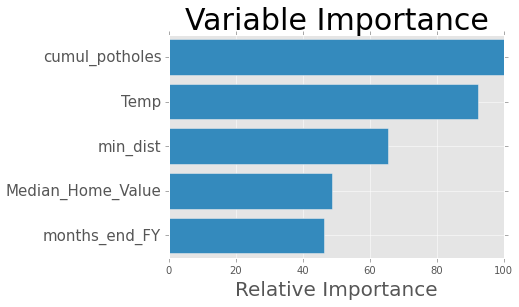

In [213]:
plot_importance(rfc, X_train, max_features=5)

In [214]:
def plot_importance_save(clf, X, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names, fontsize=15)
    plt.xlabel('Relative Importance', fontsize=20)
    plt.title('Variable Importance', fontsize=30)
    plt.savefig('bar_importance.png')

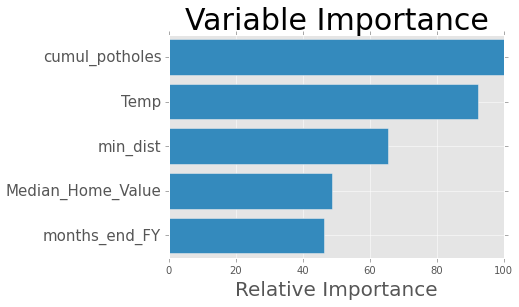

In [215]:
plot_importance_save(rfc, X_train, max_features=5)

In [216]:
clf = DecisionTreeClassifier()

In [217]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [218]:
clf.score(X_test, y_test)

0.59717607973421927

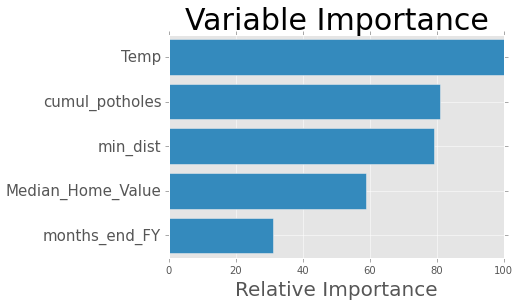

In [219]:
plot_importance(clf, X_train, max_features=5)

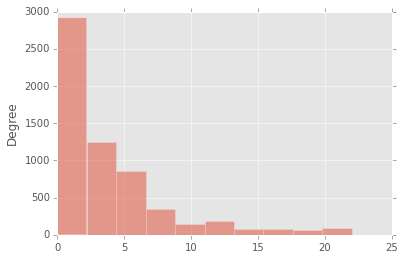

In [240]:
df_95['DURATION_td'].plot(kind='hist', alpha=0.5)

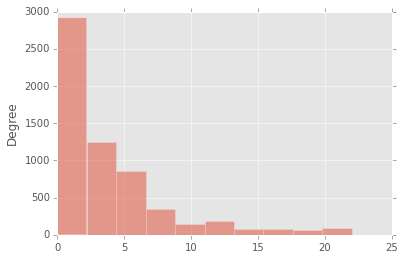

In [239]:
ax = fig.add_subplot(111)
df_95['DURATION_td'].plot(kind='hist', alpha=0.5)
plt.savefig('duration.png')

In [220]:
clf.tree_

In [222]:
clf.max_features_

130L

In [223]:
clf.classes_

array([0, 1], dtype=int64)

In [224]:
from sklearn.tree import export_graphviz

In [226]:
export_graphviz(clf, max_depth=5, out_file='tree.dot') 

In [227]:
import subprocess

see http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html

In [232]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, max_depth=5, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [234]:
visualize_tree(clf, X.columns.tolist())

####Not working

####What's left to try?

1. NLP on location
2. temp < freezing
3. look at end of fY patterns